# AAS summative: data imputation code

## set-up

In [1]:
## libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [2]:
## mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## routing to file path
%cd /content/drive/My Drive/Oxford_SDS_2324/AAS/Summative

/content/drive/My Drive/Oxford_SDS_2324/AAS/Summative


## Import unimputed data

In [4]:
## data import
dat_unimputed = pd.read_csv ("merged_dat.csv")

In [5]:
## view data samnple
display (dat_unimputed)

,orig_dest_year,orig_dest,orig,dest,year,forced_mig,political_stability_orig,freedom_torture_orig,freedom_killings_orig,class_equality_lib_orig,...,col_dep_ever,sibling,sibling_ever,scaled_sci_2021,labour_part_rate_total_orig,labour_part_rate_male_orig,labour_part_rate_female_orig,labour_part_rate_total_dest,labour_part_rate_male_dest,labour_part_rate_female_dest
0,ESH_DZA_1978,ESH_DZA,ESH,DZA,1978,50000.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COD_DZA_1978,COD_DZA,COD,DZA,1978,NaN,NaN,-1.943,-2.275,-1.283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNK_DZA_1978,UNK_DZA,UNK,DZA,1978,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SDN_DZA_1978,SDN_DZA,SDN,DZA,1978,NaN,NaN,-0.602,-1.057,-0.489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SOM_DZA_1978,SOM_DZA,SOM,DZA,1978,NaN,NaN,-2.461,-2.427,-1.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184348,XXA_MNE_2023,XXA_MNE,XXA,MNE,2023,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184349,BIH_MNE_2023,BIH_MNE,BIH,MNE,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184350,HRV_MNE_2023,HRV_MNE,HRV,MNE,2023,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184351,COL_TTO_2023,COL_TTO,COL,TTO,2023,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Perform multivariate imputation

In [39]:
## establising imputation minima and maxima
mins = [0,
        0,
        1978,
        0,
        -2.5,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        -2.5,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        91.0,
        0,
        0,
        0,
        0,
        0,
        0]

maxs = [182,
        156,
        2023,
        3737369.0,
        2.5,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        1,
        1410929362.0,
        1,
        1,
        1,
        2.5,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        1,
        1410929362.0,
        1,
        1,
        1,
        1,
        19139.0,
        22996100000.0,
        22996100000.0,
        99.152,
        179.479,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        4922746.0,
        100,
        100,
        100,
        100,
        100,
        100]

In [29]:
## df copy
dat_imputed = dat_unimputed.copy()
dat_imputed = dat_imputed.drop (columns = ["orig_dest", "orig_dest_year"])

## label encoding
label_encoder = LabelEncoder()
dat_imputed['orig'] = label_encoder.fit_transform (dat_imputed['orig'])
dat_imputed['dest'] = label_encoder.fit_transform (dat_imputed['dest'])

In [40]:
## initialise imputer
imputer = IterativeImputer (random_state = 0,
                            skip_complete = True,
                            sample_posterior = True,
                            min_value = mins,
                            max_value = maxs)

## transform entire dataset to impute missing values
dat_imputed2 = imputer.fit_transform (dat_imputed)

## update original dataframe with imputed values
dat_imputed.iloc[:, :] = dat_imputed2

<ipython-input-40-d4cb10b43e9d>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dat_imputed.iloc[:, :] = dat_imputed2


In [41]:
## reversing label encoding
dat_imputed2 = dat_imputed.copy()
dat_imputed2 = dat_imputed2.drop (columns = ['orig', 'dest', 'year'])
id_cols = dat_unimputed.iloc[:, :5]
dat_imputed2 = pd.concat ([id_cols, dat_imputed2], axis = 1)
display (dat_imputed2)

,orig_dest_year,orig_dest,orig,dest,year,forced_mig,political_stability_orig,freedom_torture_orig,freedom_killings_orig,class_equality_lib_orig,...,col_dep_ever,sibling,sibling_ever,scaled_sci_2021,labour_part_rate_total_orig,labour_part_rate_male_orig,labour_part_rate_female_orig,labour_part_rate_total_dest,labour_part_rate_male_dest,labour_part_rate_female_dest
0,ESH_DZA_1978,ESH_DZA,ESH,DZA,1978,50000.000000,-2.374195,0.918882,0.695626,1.028775,...,0.000000,0.000000,0.000000,127549.535273,63.274540,87.303177,40.327428,74.745947,85.146721,64.980891
1,COD_DZA_1978,COD_DZA,COD,DZA,1978,57951.360842,-0.866914,-1.943000,-2.275000,-1.283000,...,0.265086,0.141195,0.647154,536293.883253,61.260418,84.458368,38.109594,73.339700,83.094691,61.369697
2,UNK_DZA_1978,UNK_DZA,UNK,DZA,1978,51797.724334,0.178548,2.030421,2.074965,0.668384,...,0.023891,0.581027,0.998683,264599.495490,63.749807,67.065132,58.600487,68.448453,81.157154,55.051869
3,SDN_DZA_1978,SDN_DZA,SDN,DZA,1978,58471.496280,-1.386337,-0.602000,-1.057000,-0.489000,...,0.149622,0.117794,0.592898,376134.735878,58.938732,92.002233,29.236261,74.273807,90.403906,58.608360
4,SOM_DZA_1978,SOM_DZA,SOM,DZA,1978,27527.302235,-1.474132,-2.461000,-2.427000,-1.005000,...,0.000000,0.340346,0.844184,91.000000,66.658578,81.678871,48.650003,72.543894,89.043217,56.585421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184348,XXA_MNE_2023,XXA_MNE,XXA,MNE,2023,0.000000,0.518031,1.821530,2.836337,0.073032,...,0.489940,0.549298,0.209557,91.000000,62.183190,62.083019,59.186420,69.715472,74.341047,65.643691
184349,BIH_MNE_2023,BIH_MNE,BIH,MNE,2023,149729.423515,-0.730900,0.741704,1.436833,1.545383,...,0.222240,0.241672,0.487265,438443.951665,63.090274,67.623259,61.919832,68.593343,75.372816,61.917484
184350,HRV_MNE_2023,HRV_MNE,HRV,MNE,2023,185618.444868,-0.383372,1.803120,3.147846,1.049299,...,0.442909,0.325738,0.563313,185671.239071,72.020448,75.144194,65.254620,68.383925,73.178943,63.680103
184351,COL_TTO_2023,COL_TTO,COL,TTO,2023,72.000000,-1.310786,2.479941,2.471336,1.063454,...,0.197471,0.468017,0.290878,698397.899950,60.074993,66.853145,49.859675,69.665933,77.154190,61.364151


In [42]:
## checking specific dyads to see if imputed values make sense
display (dat_imputed2 [dat_imputed2['orig_dest'] == 'MMR_BGD'])

,orig_dest_year,orig_dest,orig,dest,year,forced_mig,political_stability_orig,freedom_torture_orig,freedom_killings_orig,class_equality_lib_orig,...,col_dep_ever,sibling,sibling_ever,scaled_sci_2021,labour_part_rate_total_orig,labour_part_rate_male_orig,labour_part_rate_female_orig,labour_part_rate_total_dest,labour_part_rate_male_dest,labour_part_rate_female_dest
405,MMR_BGD_1978,MMR_BGD,MMR,BGD,1978,160000.000000,-2.077656,-1.401000,-0.841000,-0.649000,...,0.000000,0.000000,1.000000,1.409000e+03,68.697165,90.436473,45.473947,67.133339,83.431376,50.500111
4159,MMR_BGD_1979,MMR_BGD,MMR,BGD,1979,2276.650595,-2.249692,-1.401000,-0.841000,-0.649000,...,0.318563,0.172284,0.129375,5.913133e+05,71.170884,86.324850,56.205476,71.836451,83.607569,60.969632
7923,MMR_BGD_1980,MMR_BGD,MMR,BGD,1980,35547.137460,-0.160367,-1.401000,-0.777000,-0.649000,...,0.202225,0.000000,0.742314,5.634694e+04,52.737696,82.157951,25.793302,71.974023,88.048011,58.223112
11688,MMR_BGD_1981,MMR_BGD,MMR,BGD,1981,106065.081664,-1.582794,-1.401000,-0.777000,-0.649000,...,0.000000,0.375628,0.433478,4.207574e+05,55.693170,86.435274,27.532910,45.970000,85.290000,4.530000
15454,MMR_BGD_1982,MMR_BGD,MMR,BGD,1982,92428.144026,-1.613283,-1.401000,-0.777000,-0.649000,...,0.144424,0.000000,0.802973,3.467787e+05,70.736140,84.694316,59.385317,69.025788,84.069231,53.167331
19220,MMR_BGD_1983,MMR_BGD,MMR,BGD,1983,55421.987491,-1.782803,-1.401000,-0.777000,-0.649000,...,0.147004,0.136119,0.716938,3.207553e+05,57.180000,75.020000,39.910000,72.392433,82.960215,63.150700
22989,MMR_BGD_1984,MMR_BGD,MMR,BGD,1984,133229.015354,-1.552584,-1.401000,-0.777000,-0.649000,...,0.109716,0.000000,0.182251,6.928511e+05,61.029773,78.521183,41.657988,49.430000,89.770000,7.990000
26759,MMR_BGD_1985,MMR_BGD,MMR,BGD,1985,16558.349985,-0.952176,-1.401000,-0.777000,-0.649000,...,0.000000,0.276728,0.881268,9.604166e+05,67.083569,93.341268,42.127580,49.630000,89.770000,8.220000
30532,MMR_BGD_1986,MMR_BGD,MMR,BGD,1986,159246.891607,-1.362100,-1.401000,-0.777000,-0.649000,...,0.398157,0.160159,0.114137,8.182498e+05,57.880682,73.200564,39.563219,50.800000,89.960000,9.640000
34301,MMR_BGD_1987,MMR_BGD,MMR,BGD,1987,180726.807681,-0.707863,-1.401000,-0.777000,-0.649000,...,0.274920,0.150823,0.949507,5.878129e+05,58.460686,78.382114,37.646837,73.334505,90.224925,57.640173


In [43]:
## sample of imputed data
dat_imputed.sample (10)['forced_mig']

88489     218448.791890
176948         0.000000
98458         29.000000
94958         94.000000
168682        65.000000
145318       174.000000
171751         5.000000
138535        11.000000
30458     149708.884222
115458         6.000000
Name: forced_mig, dtype: float64

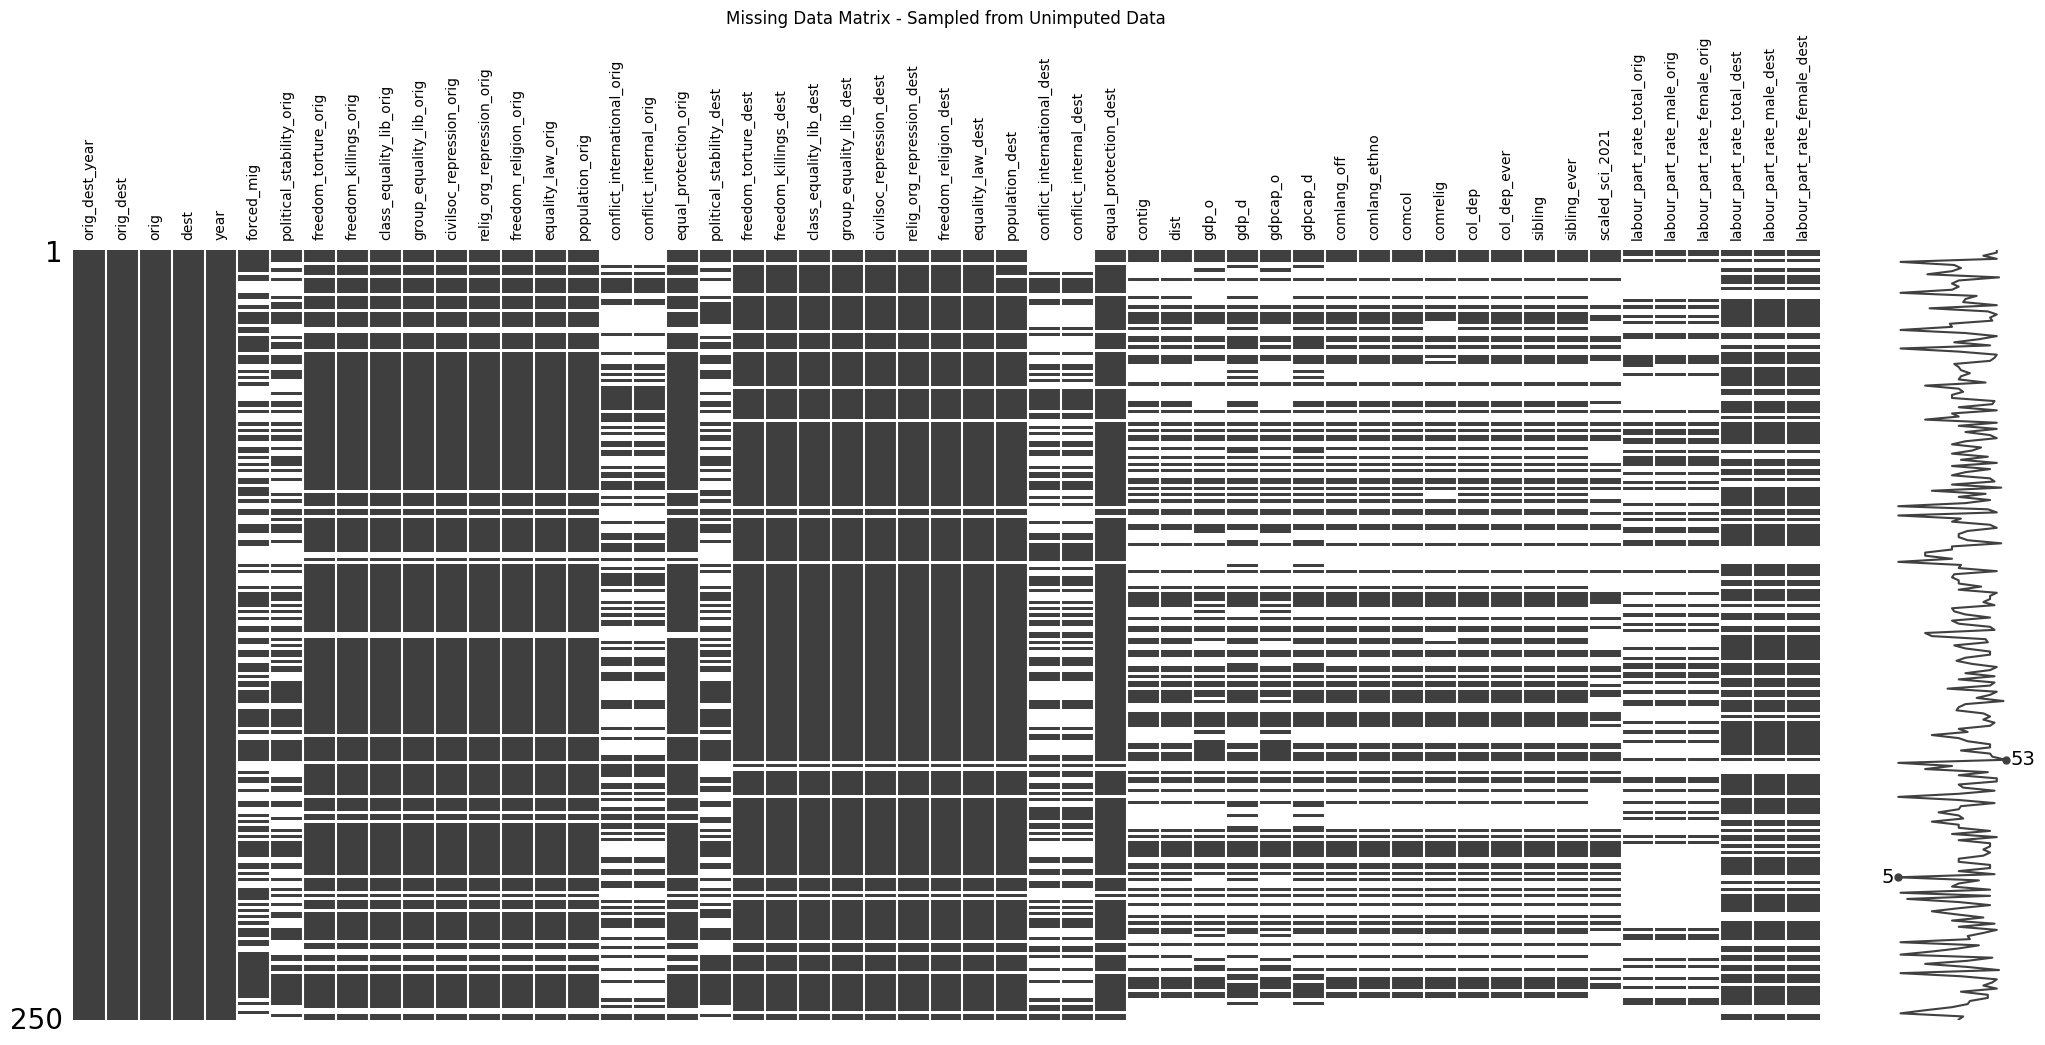

In [22]:
## NaNs matrix before imputation
sample = dat_unimputed.sample (250)
msno.matrix (sample)
plt.xticks (range (len (sample.columns)), sample.columns, rotation = 90)
plt.title('Missing Data Matrix - Sampled from Unimputed Data')
plt.show()

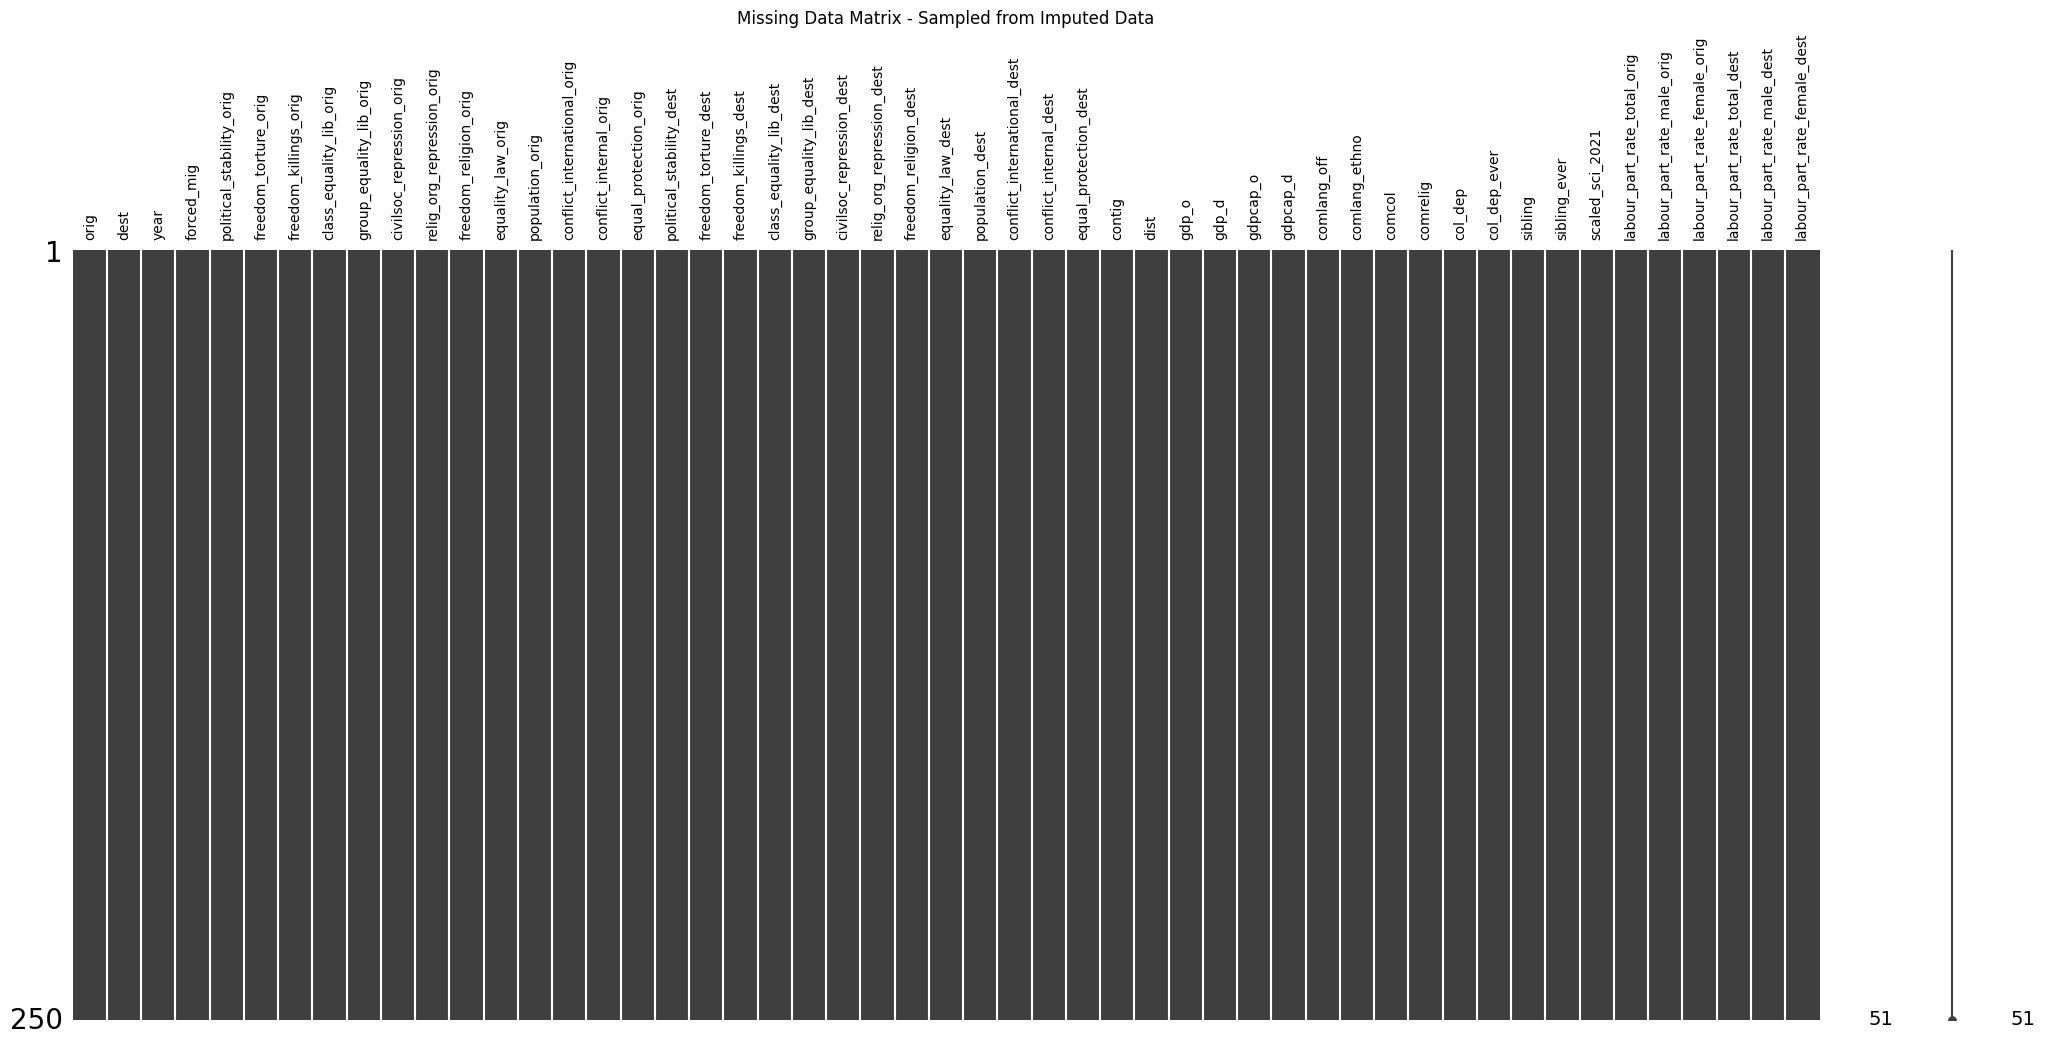

In [44]:
## NaNs matrix after imputation
sample = dat_imputed.sample (250)
msno.matrix (sample)
plt.xticks (range (len (sample.columns)), sample.columns, rotation = 90)
plt.title('Missing Data Matrix - Sampled from Imputed Data')
plt.show()

In [46]:
## saving results
dat_imputed2.to_csv('dat_imputed.csv', index = False)

### visualising correlation plot